In [3]:
import os
import cv2
from ultralytics import YOLOv10
import supervision as sv

In [9]:

# Initialize model
model_path = 'F:\\BigData\\Traffic_Violation_Detection\\data\\models\\best.pt'
model = YOLOv10(model_path)

# Path to the folder containing images
image_folder_path = 'F:\\BigData\\Traffic_Violation_Detection\\data\\tmp'

# Define annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()





0: 384x640 1 helmet, 2 reds, 3 riders, 4 stoplines, 1178.2ms
Speed: 11.5ms preprocess, 1178.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
[7 7 8 7 6 8 3 8 8 6]


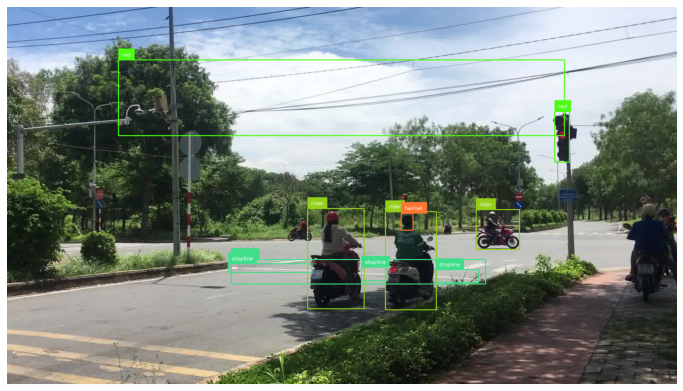


0: 288x640 1 helmet, 1 no_helmet, 2 riders, 796.2ms
Speed: 28.5ms preprocess, 796.2ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)
[7 4 7 3]


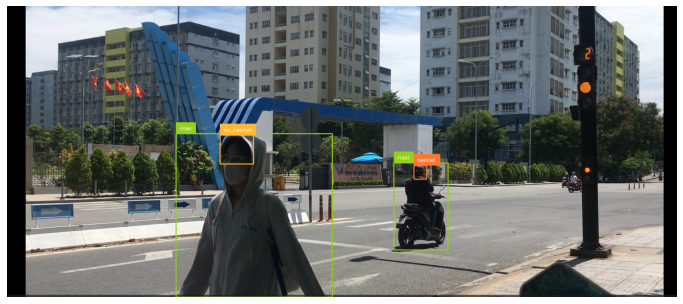


0: 288x640 1 helmet, 1 rider, 747.5ms
Speed: 3.1ms preprocess, 747.5ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 640)
[7 3]


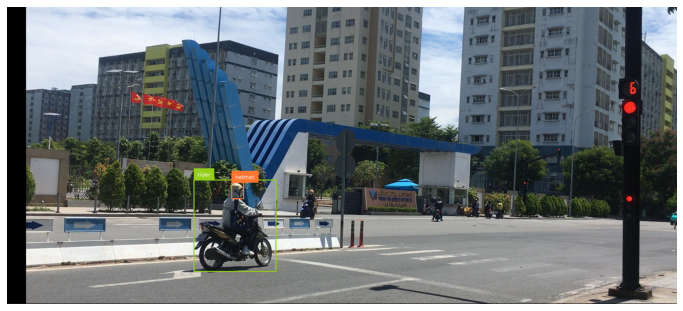


0: 320x640 1 green, 4 helmets, 1 no_helmet, 1 red, 2 riders, 889.2ms
Speed: 4.9ms preprocess, 889.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)
[7 7 4 6 2 3 3 3 3]


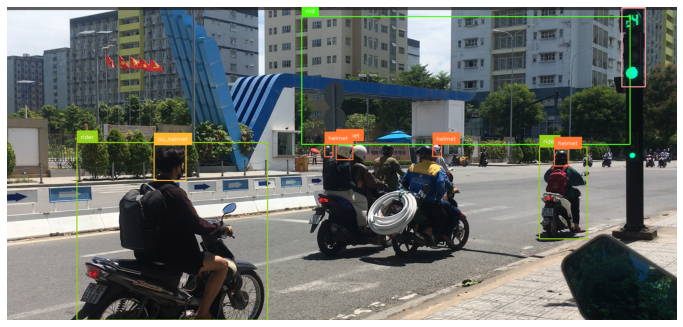


0: 640x640 2 greens, 3 helmets, 10 riders, 1 stopline, 1671.9ms
Speed: 6.7ms preprocess, 1671.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
[2 3 3 8 7 7 7 7 7 3 7 7 2 7 7 7]


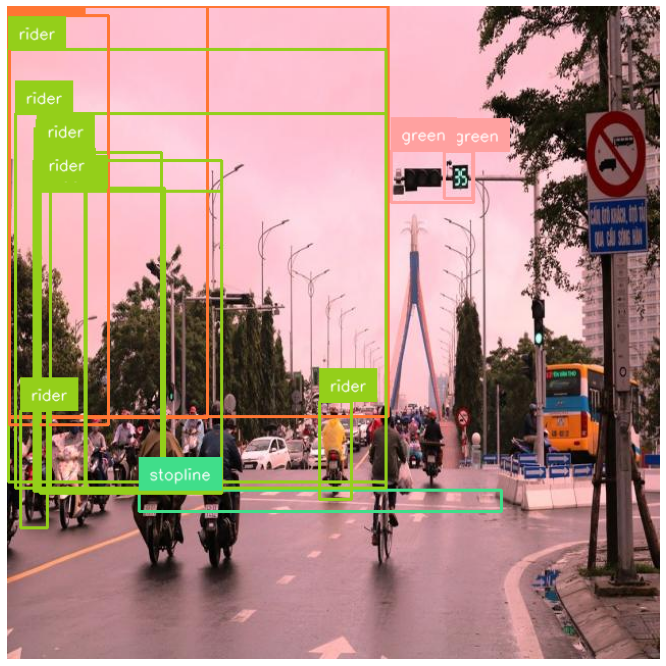


0: 640x640 1 helmet, 4 riders, 2 stoplines, 1746.9ms
Speed: 6.0ms preprocess, 1746.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
[8 3 7 8 7 7 7]


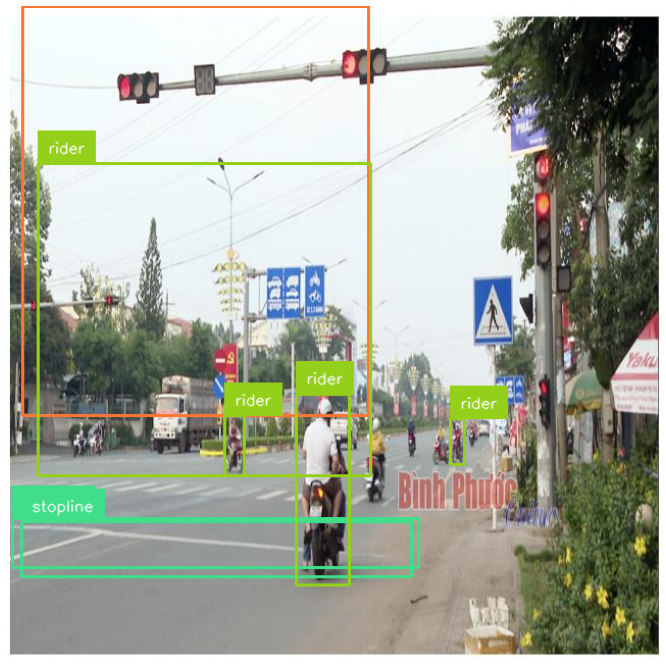


0: 640x640 2 helmets, 1 no_helmet, 2 riders, 1718.5ms
Speed: 4.9ms preprocess, 1718.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
[7 7 3 4 3]


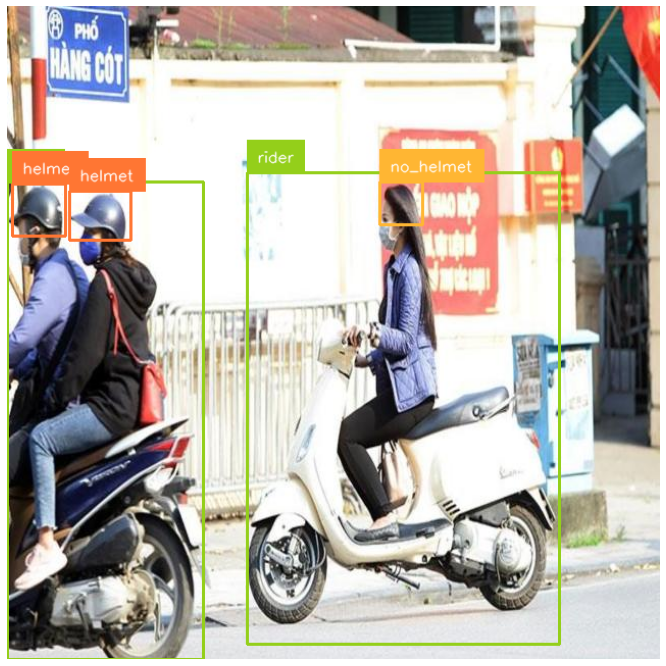


0: 640x640 1 helmet, 1 no_helmet, 3 riders, 1939.4ms
Speed: 4.5ms preprocess, 1939.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
[4 7 7 3 7]


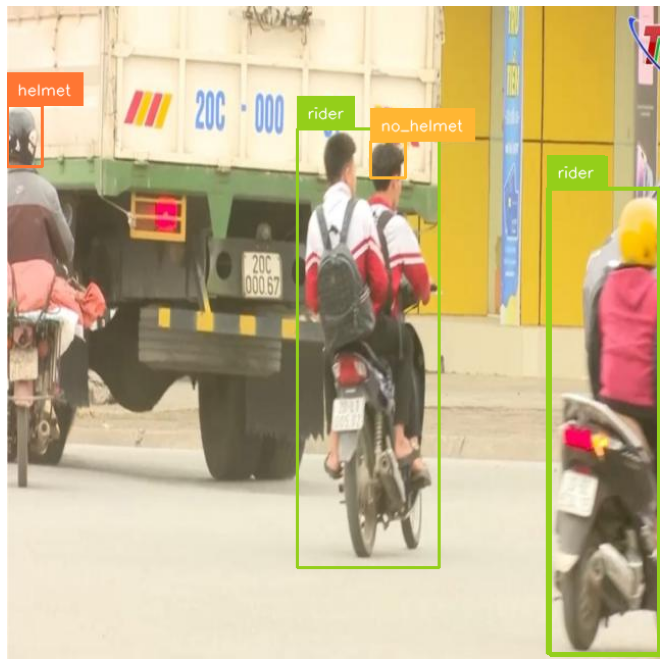


0: 640x640 1 no_helmet, 3 riders, 1691.1ms
Speed: 5.0ms preprocess, 1691.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
[4 7 7 7]


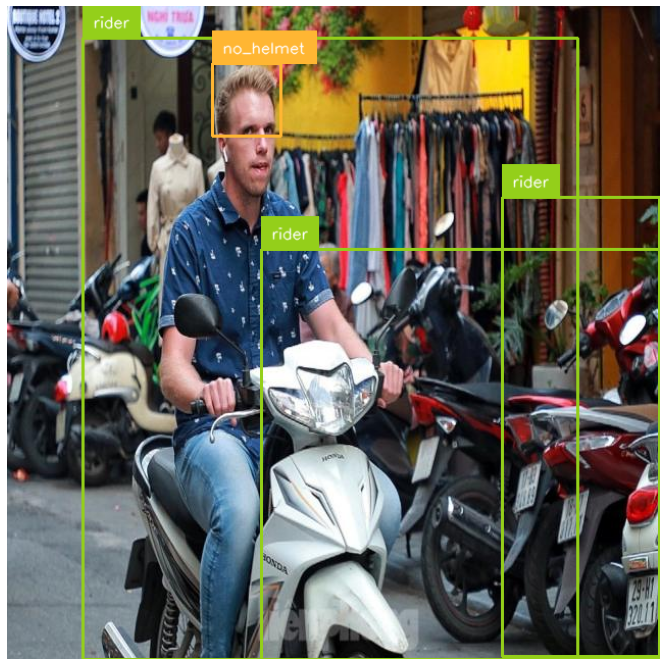


0: 640x640 1 car, 1 helmet, 3 no_helmets, 2 riders, 1838.1ms
Speed: 4.5ms preprocess, 1838.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
[7 7 4 1 4 4 3]


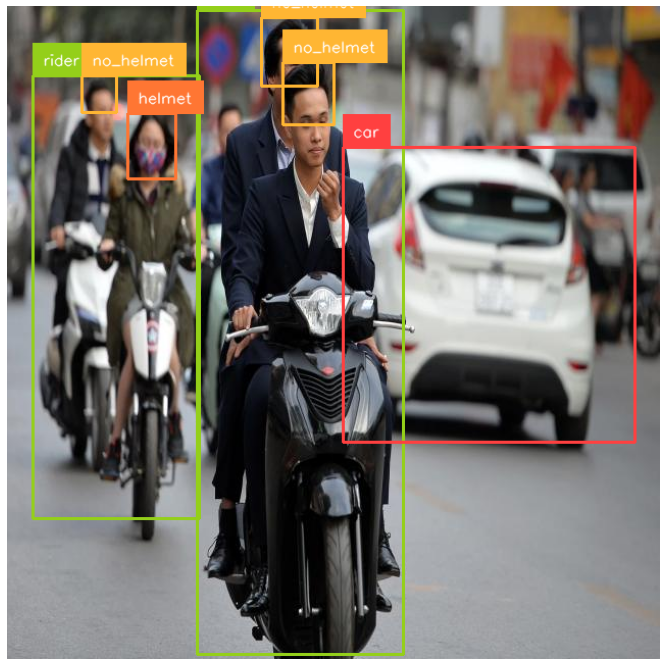


0: 640x640 1 car, 2 no_helmets, 1 rider, 1841.9ms
Speed: 4.6ms preprocess, 1841.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
[7 4 4 1]


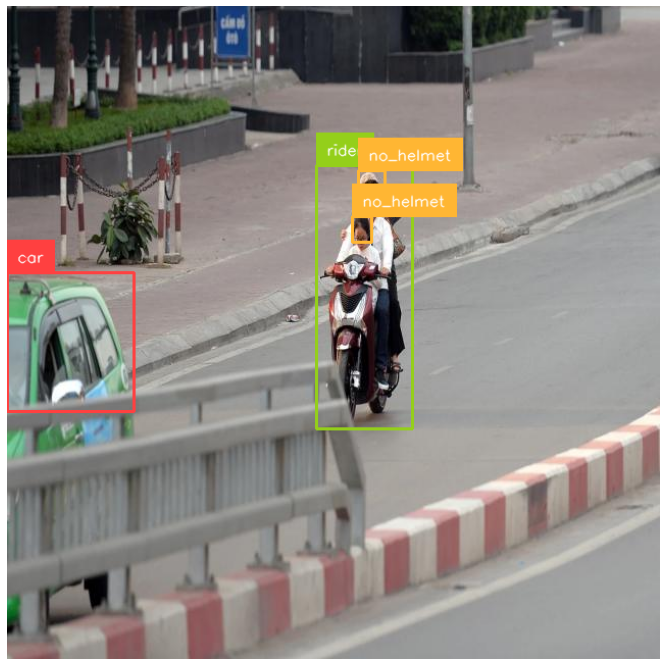


0: 640x640 3 no_helmets, 2 riders, 1894.0ms
Speed: 5.5ms preprocess, 1894.0ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
[7 4 4 7 4]


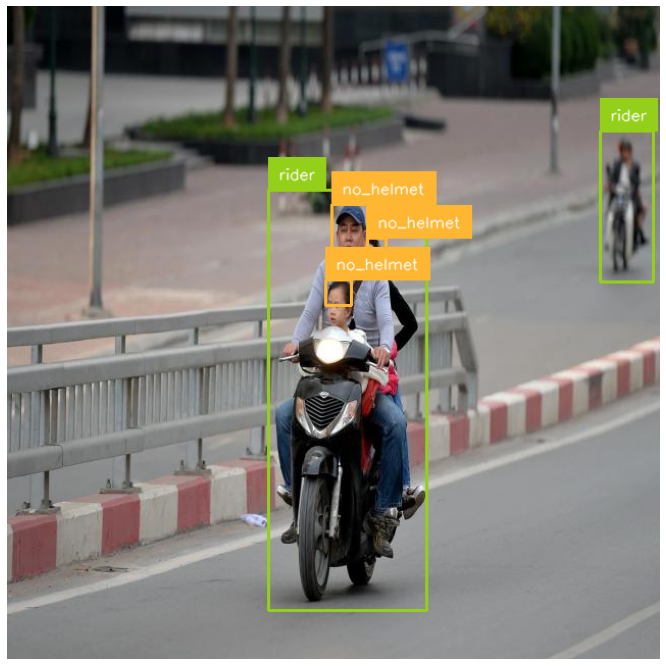


0: 640x640 2 no_helmets, 2 riders, 1970.1ms
Speed: 6.5ms preprocess, 1970.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
[7 4 4 7]


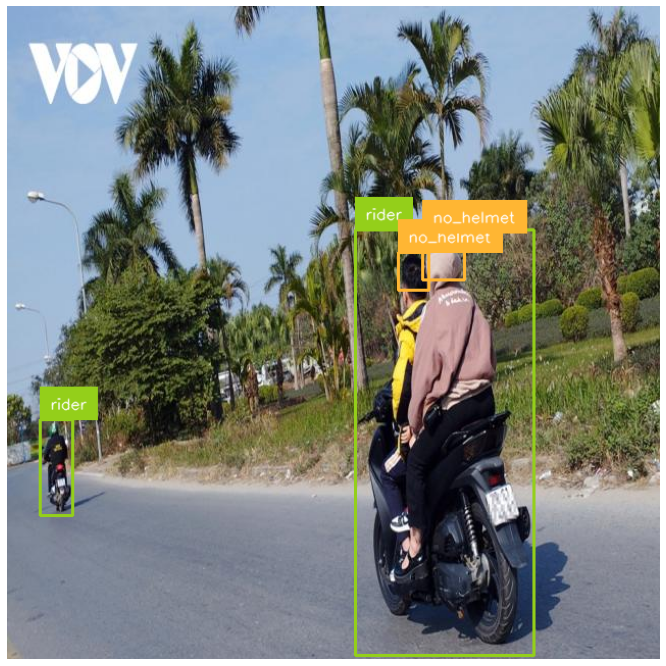

In [13]:
# Process each image in the folder
for filename in os.listdir(image_folder_path):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder_path, filename)
        image = cv2.imread(image_path)

        results = model(image)[0]
        detections = sv.Detections.from_ultralytics(results)

        annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
        annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
        #print class_id
        print(detections.class_id)
        sv.plot_image(annotated_image)